<a href="https://colab.research.google.com/github/russkarki7/Concept-and-technology-of-ai/blob/main/RussKarki_2436484_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [2]:


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.feature_selection import SelectKBest, f_regression

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


Load Bike Sharing Dataset

In [3]:


df = pd.read_csv("/content/drive/MyDrive/RussKarki_2436484_FinalAssignment/day.csv")

print(df.shape)
df.head()


(731, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


 Dataset Understanding

In [4]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Check Missing Values

In [5]:
df.isnull().sum()


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


 Drop Non-Predictive Columns

In [6]:
# instant and dteday are identifiers → remove

df = df.drop(columns=["instant", "dteday"])


 Target Definition

In [7]:
# Target = total bike rentals
target = "cnt"


 Exploratory Data Analysis (EDA)

Distribution of Target

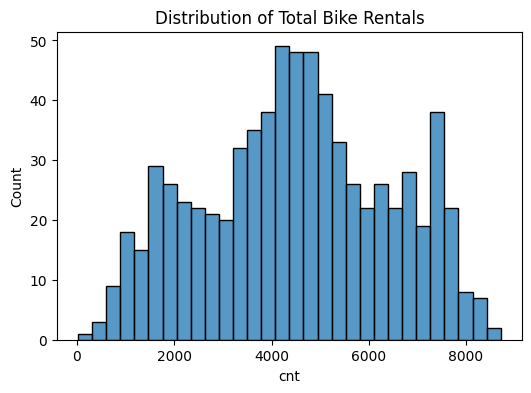

In [8]:
plt.figure(figsize=(6,4))
sns.histplot(df["cnt"], bins=30)
plt.title("Distribution of Total Bike Rentals")
plt.show()


Correlation Heatmap

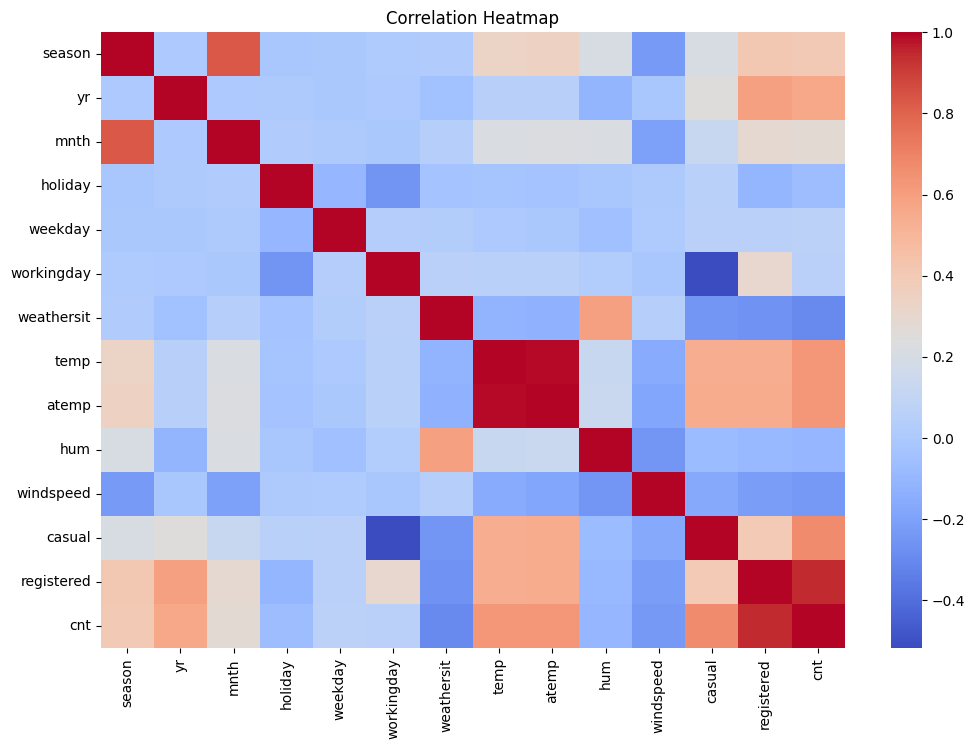

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


Rentals vs Temperature

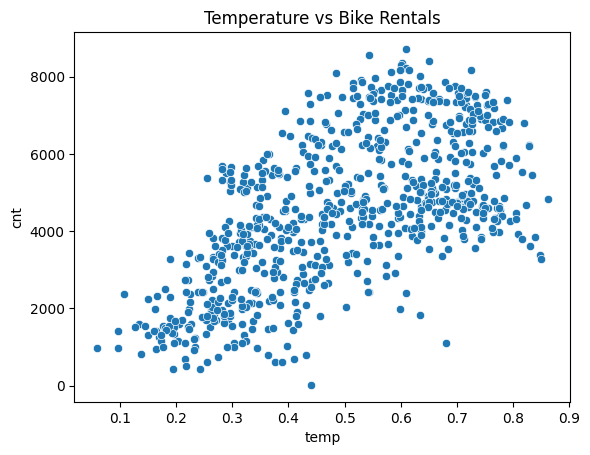

In [10]:
sns.scatterplot(x="temp", y="cnt", data=df)
plt.title("Temperature vs Bike Rentals")
plt.show()


Feature / Target Split

In [11]:
X = df.drop(columns=["cnt"])
y = df["cnt"]


Train Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


Scaling (Needed for NN & Linear)

In [13]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Neural Network Regression Model

In [14]:


nn = MLPRegressor(
    hidden_layer_sizes=(64,32),
    activation="relu",
    solver="adam",
    max_iter=500,
    random_state=42
)

nn.fit(X_train_scaled, y_train)

y_pred_nn = nn.predict(X_test_scaled)


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


NN Evaluation

In [15]:
print("Neural Network Performance")

print("MSE:", mean_squared_error(y_test, y_pred_nn))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_nn)))
print("MAE:", mean_absolute_error(y_test, y_pred_nn))
print("R2:", r2_score(y_test, y_pred_nn))


Neural Network Performance
MSE: 520974.09184316004
RMSE: 721.7853502552958
MAE: 546.5230651324198
R2: 0.8700774600475366


Classical Model 1 — Linear Regression

In [16]:
linreg = LinearRegression()

linreg.fit(X_train_scaled, y_train)

y_pred_lin = linreg.predict(X_test_scaled)


Linear Regression Metrics

In [17]:
print("Linear Regression")

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lin)))
print("R2:", r2_score(y_test, y_pred_lin))


Linear Regression
RMSE: 1.5350372405830216e-12
R2: 1.0


Classical Model 2 — Random Forest

In [18]:
rf = RandomForestRegressor(random_state=42)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


Random Forest Metrics

In [19]:
print("Random Forest")

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2:", r2_score(y_test, y_pred_rf))


Random Forest
RMSE: 98.95402361600017
R2: 0.9975580582957074


Cross Validation Scores

In [ ]:
cv_lin = cross_val_score(linreg, X_train_scaled, y_train,
                         cv=5, scoring="r2")

cv_rf = cross_val_score(rf, X_train, y_train,
                        cv=5, scoring="r2")

print("Linear CV R2:", cv_lin.mean())
print("RF CV R2:", cv_rf.mean())


Linear CV R2: 1.0
RF CV R2: 0.9941645565995063


Hyperparameter Tuning

Random Forest GridSearch

In [20]:
rf_params = {
    "n_estimators": [100,200],
    "max_depth": [5,10,None],
    "min_samples_split": [2,5]
}

grid_rf = GridSearchCV(
    RandomForestRegressor(random_state=42),
    rf_params,
    cv=5,
    scoring="r2"
)

grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_

print("Best RF Params:", grid_rf.best_params_)
print("Best RF CV Score:", grid_rf.best_score_)


Best RF Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best RF CV Score: 0.9941997810570842


Feature Selection (Filter Method)

In [21]:
selector = SelectKBest(score_func=f_regression, k=8)

X_train_fs = selector.fit_transform(X_train, y_train)
X_test_fs = selector.transform(X_test)

selected_features = X.columns[selector.get_support()]

print("Selected Features:")
print(selected_features)


Selected Features:
Index(['season', 'yr', 'mnth', 'weathersit', 'temp', 'atemp', 'casual',
       'registered'],
      dtype='object')


Final Models with Selected Features

Final Linear Regression

In [22]:
linreg.fit(X_train_fs, y_train)
y_final_lin = linreg.predict(X_test_fs)


Final Random Forest

In [23]:
best_rf.fit(X_train_fs, y_train)
y_final_rf = best_rf.predict(X_test_fs)


Final Evaluation Function

In [24]:
def reg_metrics(name, y_true, y_pred):
    print("\n", name)
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("R2:", r2_score(y_true, y_pred))


Final Results

In [ ]:
reg_metrics("Final Linear", y_test, y_final_lin)
reg_metrics("Final Random Forest", y_test, y_final_rf)



 Final Linear
RMSE: 2.60877116465937e-12
MAE: 2.1567872204750714e-12
R2: 1.0

 Final Random Forest
RMSE: 95.94631436097889
MAE: 60.35598639455784
R2: 0.9977042480110537


Comparison Table (For Report)

In [ ]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "Features Used": [len(selected_features), len(selected_features)],
    "Test RMSE": [
        np.sqrt(mean_squared_error(y_test, y_final_lin)),
        np.sqrt(mean_squared_error(y_test, y_final_rf))
    ],
    "Test R2": [
        r2_score(y_test, y_final_lin),
        r2_score(y_test, y_final_rf)
    ]
})

results


,Model,Features Used,Test RMSE,Test R2
0,Linear Regression,8,2.608771e-12,1.000000
1,Random Forest,8,9.594631e+01,0.997704
